Để kiểm tra mức độ hiểu quả của một thuật toán, chúng ta sẽ làm một ví dụ đơn giản (thường được gọi là toy example). Trước hết, chúng ta chọn center cho từng cluster và tạo dữ liệu cho từng cluster bằng cách lấy mẫu theo phân phối chuẩn có kỳ vọng là center của cluster đó và ma trận hiệp phương sai (covariance matrix) là ma trận đơn vị.

In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [4]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500

X0 = np.random.multivariate_normal(means[0], cov, N) ## Create x,y theo phân phối chuẩn
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)


In [5]:
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3


In [6]:
X

array([[ 3.74945474,  1.713927  ],
       [ 1.51543487, -0.65331856],
       [ 1.99171537,  1.68036864],
       ...,
       [ 2.56402984,  5.10138061],
       [ 3.62998852,  6.60564711],
       [ 2.31894139,  6.84856953]])

In [7]:
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

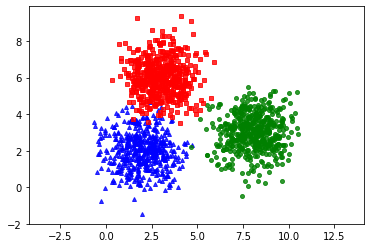

In [8]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

Centers found by scikit-learn:
[[8.0410628  3.02094748]
 [2.99357611 6.03605255]
 [1.97634981 2.01123694]]


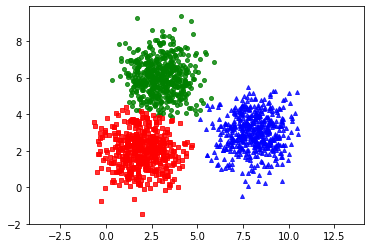

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)